### India International Investment Position (Stock of foreign assets and liabilities)

AttributeError: 'Figure' object has no attribute 'update_layout'

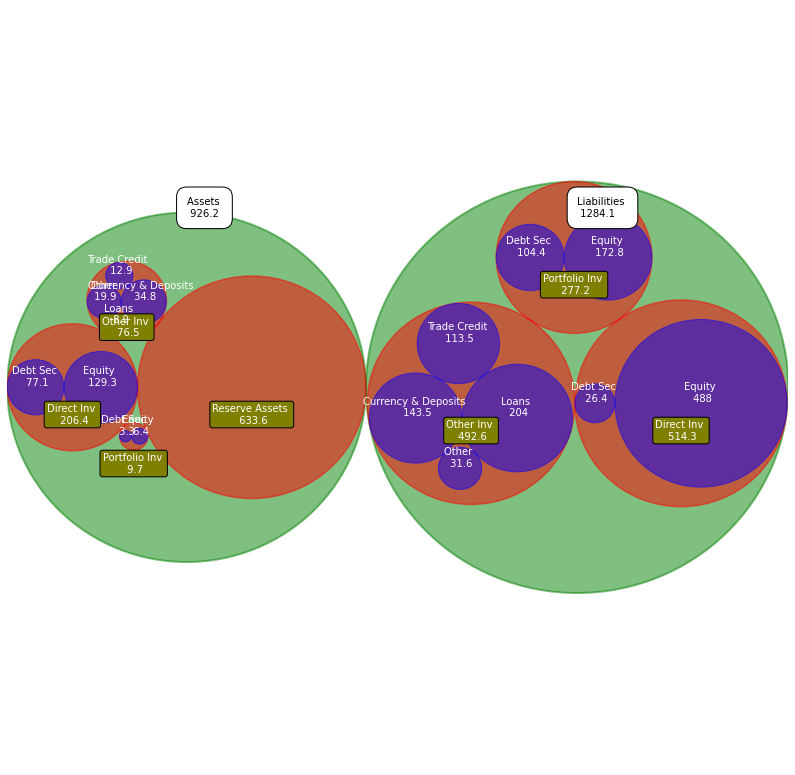

In [1]:
# International Investment Position (Stock of foreign assets and liabilities)
# data entered by hand from IIP
# Viz--> Circular Packing with multi-level Hierarchy
# Source: https://github.com/holtzy/The-Python-Graph-Gallery/blob/master/src/notebooks/circular-packing-several-levels-of-hierarchy.ipynb
# Pre-requisite Packages----> circlify
# Hierarchical Data of Popultaion of World->Continent->Country 
# import the circlify library
import circlify
import matplotlib.pyplot as plt

data = [{'id': 'India', 'datum': 2210.3 , 'children' : [
              {'id' : "Assets", 'datum': 926.2,
                   'children' : [
                     {'id' : "Direct Inv", 'datum' : 206.4,
                       'children' : [
                        {'id' : "Equity", 'datum' : 129.3},
                        {'id' : "Debt Sec", 'datum' : 77.1}
                        ]},
                     {'id' : "Portfolio Inv", 'datum' : 9.7,
                       'children' : [
                        {'id' : "Equity", 'datum' : 6.4},
                        {'id' : "Debt Sec", 'datum' : 3.3}
                        ]},
                     {'id' : "Other Inv", 'datum' : 76.5,
                       'children' : [
                        {'id' : "Trade Credit", 'datum' : 12.9},
                        {'id' : "Loans", 'datum' : 8.9},
                        {'id' : "Currency & Deposits", 'datum' : 34.8},
                        {'id' : "Other", 'datum' : 19.9}
                        ]},
                     {'id' : "Reserve Assets", 'datum' : 633.6}
                   ]},
    
                  {'id' : "Liabilities", 'datum': 1284.1,
                   'children' : [
                     {'id' : "Direct Inv", 'datum' : 514.3,
                      'children' : [
                        {'id' : "Equity", 'datum' : 488},
                        {'id' : "Debt Sec", 'datum' : 26.4}
                        ]},
                     {'id' : "Portfolio Inv", 'datum' : 277.2,
                       'children' : [
                        {'id' : "Equity", 'datum' : 172.8},
                        {'id' : "Debt Sec", 'datum' : 104.4}
                        ]},
                     {'id' : "Other Inv", 'datum' : 492.6,
                       'children' : [
                        {'id' : "Trade Credit", 'datum' : 113.5},
                        {'id' : "Loans", 'datum' : 204},
                        {'id' : "Currency & Deposits", 'datum' : 143.5},
                        {'id' : "Other", 'datum' : 31.6}
                        ]}
                  ]}                    
        ]}]

# Compute circle positions thanks to the circlify() function
circles = circlify.circlify(
    data, 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)


# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(14,14))

# Title
#ax.set_title('International Investment Position - India (USD Billion)')

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# Print circle the highest level (continents):
for circle in circles:
    if circle.level != 2:
      continue
    x, y, r = circle
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="green"))

# Print circle and labels for the mezzanine level:
for circle in circles:
    if circle.level != 3:
      continue
    x, y, r = circle
    label = circle.ex["id"] + " \n " +  str(circle.ex["datum"] )
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=1.5, color="red"))
    plt.annotate(label, (x,y-0.1 ),va='bottom', ha='center', color="white", bbox=dict(facecolor='olive', edgecolor='black', boxstyle='round', pad=0.25))

# Print circle and labels for the lowest level:
for circle in circles:
    if circle.level != 4:
      continue
    x, y, r = circle
    label = circle.ex["id"] + " \n " +  str(circle.ex["datum"] ) 
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=1, color="blue"))
    plt.annotate(label, (x,y),va='bottom',  ha='center', color="white")
    
# Print labels for the continents
for circle in circles:
    if circle.level != 2:
      continue
    x, y, r = circle
    label = circle.ex["id"] + " \n " +  str(circle.ex["datum"] ) 
    plt.annotate(label, (x,y+0.5), va='top', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=1))

#fig.update_layout(title="International Investment Position (Stock of foreign assets & liabilities)")


### External Debt (Stock Account)
    1. Debt by Source / Creditor
    2. Debt by Destination / Debitor / user
    3. Debt by Instrument

### External Debt (Instrument-wise)

In [11]:
# External Debt by Instrument type
import pandas as pd
import plotly.express as px

df_ins= pd.read_excel(r'/Users/kalyan/Library/CloudStorage/OneDrive-IIMVIZAG/Python-Exercise-KK/Kalyan-Jupyter-Notebooks/data/India-External Debt.xlsx', 
                      sheet_name='EX-DEBT-INSTRUMENT') 
#cols=list(df_ins.columns.values.tolist())
#print(df_ins)
fig = px.treemap(
    df_ins, path=[px.Constant("External Debt by Instrument (USD Billion)"),'Instrument code','Dec-21 P'],
    values=df_ins['Dec-21 P'],labels=df_ins['Instrument'],
    color_continuous_scale='RdBu', color=df_ins['Instrument']
)
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()



### External Debt (Borrower / Debtor-wise)  - Stock
**Who in India is Indebted to Foreigners ?**

In [9]:
# External Debt by Debtor
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px

df_bor= pd.read_excel(r'/Users/kalyan/Library/CloudStorage/OneDrive-IIMVIZAG/Python-Exercise-KK/Kalyan-Jupyter-Notebooks/data/India-External Debt.xlsx', 
                      sheet_name='EX-DEBT-BORROWER') 

fig = px.sunburst(df_bor, path=['Borrow_Category', 'Borrower'], values='Dec-21 P')
fig.update_traces(hoverinfo='label+ text + percent parent', 
                    textinfo='label + value + percent parent', 
                    textfont_size=12)
fig.update_layout(title="External Debt (by borrower category)", margin = dict(t=40, l=10, r=10, b=10), 
                paper_bgcolor="darkgrey",width=600)
fig.show()

### External Debt (Lender /Creditor-wise) - Stock
** Who is lending to India?**

In [10]:
# External Debt by Lender
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go

df_lend= pd.read_excel(r'./data/India-External Debt.xlsx', sheet_name='EX-DEBT-LENDER') 

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=df_lend['Lender'], 
                                values=df_lend['Dec-21 P'], 
                                hole=.25, 
                                pull=[0.1,0.2,0.1,0,0.1,0,0.1,0])],                                
                                )
fig.update_traces(hoverinfo='label+ value + percent', 
                    textinfo='value + percent', 
                    textfont_size=12)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",width=600,height=600
)
fig.show()

FileNotFoundError: [Errno 2] No such file or directory: './data/India-External Debt.xlsx'